In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

import bulk_case_runner
import earth_model


In [2]:
prem = earth_model.Prem()
m_oc = prem.mass(3480.0, r_inner=1221.5)
s_per_ga = 60.0*60.0*24.0*365.0*1.0E9

In [3]:
def _sciformat(x, pos=None):
    if x == 0:
        return "0.0"
    scistr = "{:E}".format(x)
    vals = scistr.split('E')
    fmttick = "${:.1f}".format(float(vals[0])) + r"\times 10^{" + "{}".format(int(vals[1])) + "}$"
    return fmttick

def plot_case_figure(data):
    
    fig, ax = plt.subplots(figsize=(7,6))
   
    plot_lines(ax, **data)
    
    ax2 = ax.twinx() 
    ax2.plot(data['analysis_radii'][1:]/1000.0, data['solid_vf'][1:], 'g--')
    ax2.set_ylabel('Volume fraction solid', color='g')
    ax2.tick_params(axis='y', labelcolor='g')
    ax2.yaxis.set_major_formatter(_sciformat)

    ax_ins = inset_axes(ax, width="55%", height="55%", loc=1, borderpad=1)
    im = plot_csd(ax_ins, **data)
    
    #cbax = fig.add_axes((0.5,0.5,0.1,0.1))
    cb = plt.colorbar(im, ax=ax, location='bottom',
                 shrink=0.5, anchor=(0.0,1.0))
    cb.set_label('Number of particles per m$^{3}$')
    
    plt.figtext(0.6, 0.21, f"Latent heat production: {data['total_latent_heat']/1E12:.2g} TW", figure=fig)
    plt.figtext(0.6, 0.18, f"Oxygen production: {((data['total_o_rate']*s_per_ga)/m_oc)*100.0:.2g} wt.%/Ga", figure=fig)
    plt.figtext(0.6, 0.15, f"Inner core growth: {data['growth_rate']:.2g} km/Myr", figure=fig)
 
    plt.show()

def plot_lines(ax, analysis_radii, nucleation_rates, r_icb, f_layer_thickness, solid_vf,
               **other_data):
    ax.plot(analysis_radii/1000.0, nucleation_rates, 'k')
    ax.set_xlim(r_icb/1000.0, (r_icb+f_layer_thickness)/1000.0)
    ax.yaxis.set_major_formatter(_sciformat)
    ax.set_xlabel('Radius (km)')
    ax.set_ylabel('Nucleation rate (m$^{-3}$ s$^{-1}$)')
   
    
def plot_csd(ax, particle_radii, analysis_radii, partial_particle_densities, r_icb,
             f_layer_thickness, **other_data):
    
    
    
    max_particle_radius = particle_radii[particle_radii > 0.0].max()
    min_particle_radius = particle_radii[particle_radii > 0.0].min()
    #print("Particle radii between {:.3g} and {:.3g} m".format(max_particle_radius, min_particle_radius))

    particle_size_distributions = []
    edges = None
    binsin = np.linspace(0, max_particle_radius, 11)

    for i, r in enumerate(analysis_radii):
        csd, edg = np.histogram(particle_radii[i,:], 
                                weights=partial_particle_densities[i,:],
                                range=(min_particle_radius, max_particle_radius),
                                bins=binsin)
        if edges is None:
            edges = edg
        else:
            assert np.array_equal(edges, edg)
    
        particle_size_distributions.append(csd)

    csd = np.array(particle_size_distributions)

    im = ax.imshow(csd[1:,:].T, aspect='auto', interpolation='none', 
                   cmap=plt.get_cmap('Greys'), origin='lower', 
                   extent=[analysis_radii[1]/1000.0, analysis_radii[-1]/1000.0,
                           edges[0], edges[-1]], norm=mplc.LogNorm())
        
    ax.set_ylabel('Particle radius (m)')
    ax.set_xlabel('Radius (km)')
    ax.set_xlim(r_icb/1000.0, (r_icb+f_layer_thickness)/1000.0)
    
    return im



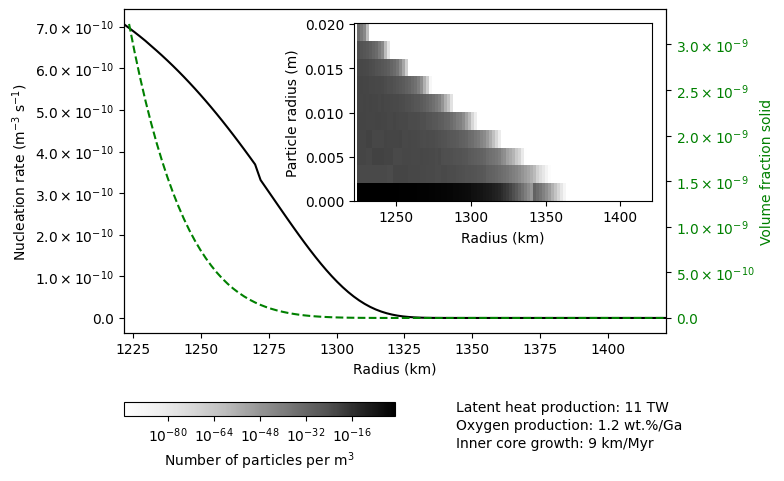

In [4]:
# Light blue dimond

data = bulk_case_runner.load_case_data(
    '/Users/andreww/Code/slurry_cases/light_blue_hetro/cases_details/case_-25.0_-0.000625.pkl')
plot_case_figure(data)

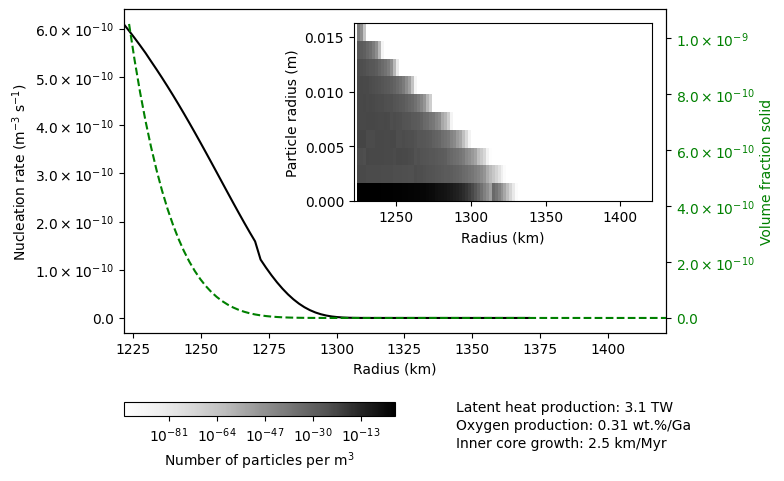

In [5]:
# Light blue square

data = bulk_case_runner.load_case_data(
    '/Users/andreww/Code/slurry_cases/light_blue_hetro/cases_details/case_40.0_0.01.pkl')
plot_case_figure(data)

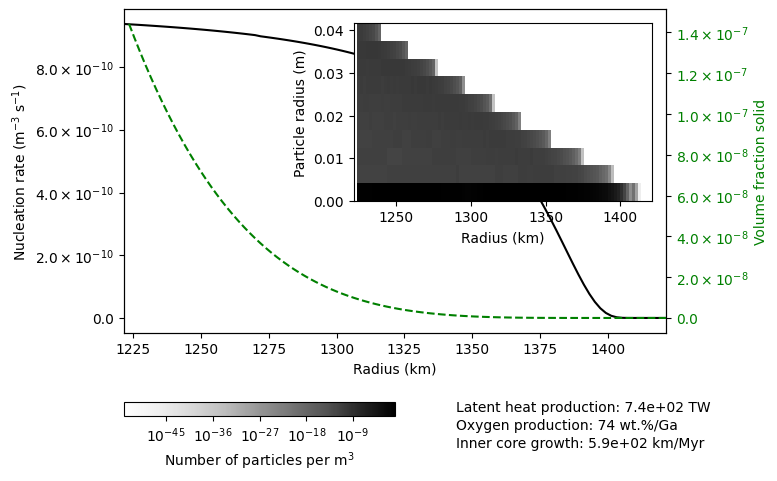

In [6]:
# Deep in the high latent heat zone

data = bulk_case_runner.load_case_data(
    '/Users/andreww/Code/slurry_cases/light_blue_hetro/cases_details/case_-25.0_0.01.pkl')
plot_case_figure(data)